## Calculating Reaction Properties

### Getting ready

Functions from the pyCHNOSZ, pandas, and matplotlib packages are used in this demo. Import them with:

In [1]:
from pyCHNOSZ import *
import pandas as pd
import matplotlib.pyplot as plt

Use info("name") to search for the index number of a chemical species in the thermodynamic database, [OBIGT](https://chnosz.net/vignettes/OBIGT.html).

In [2]:
info("Pyri")  # a partial name might result in approximate matches to try

info.approx: 'Pyri' is ambiguous; has approximate matches to 14 species:

 [1] "a-aminobutyric acid" "deoxyribose"         "chalcopyrite"       
 [4] "chalcopyrite"        "chalcopyrite"        "chlorargyrite"      
 [7] "pyrite"              "arsenopyrite"        "deoxyribose"        
[10] "pyridine"            "pyridine"            "3-methylpyridine"   
[13] "pyridine"            "3-methylpyridine"   



[NA]

In [3]:
info("pyrite") # case sensitive!

[1929]

Use info(index) to get the entry itself.

In [4]:
info(1929)

info.numeric: Cp of pyrite(cr) is NA; set by EOS parameters to 14.84 cal K-1 mol-1



,name,abbrv,formula,state,ref1,ref2,date,E_units,G,H,...,Cp,V,a,b,c,d,e,f,lambda,T
1929,pyrite,Py,FeS2,cr,HDNB78,N,1978-05-05,cal,-38293.0,-41000.0,...,14.842483,23.94,17.88,0.00132,-305000.0,0.0,0.0,0.0,0.0,1000.0


What do these columns mean? What units are entries in? We can use `help(thermo)` for documentation.

In [5]:
#help(thermo)

You can nest two info()s to look up a chemical species directly from its name.

In [6]:
info(info("pyrite"))

info.numeric: Cp of pyrite(cr) is NA; set by EOS parameters to 14.84 cal K-1 mol-1



,name,abbrv,formula,state,ref1,ref2,date,E_units,G,H,...,Cp,V,a,b,c,d,e,f,lambda,T
1929,pyrite,Py,FeS2,cr,HDNB78,N,1978-05-05,cal,-38293.0,-41000.0,...,14.842483,23.94,17.88,0.00132,-305000.0,0.0,0.0,0.0,0.0,1000.0


### Calculate standard state reaction properties

Let's calculate reaction properties for the Knallgas reaction:

$$H_{2(aq)} + \frac{1}{2}O_{2(aq)} = H_{2}O_{}$$

We can use pyCHNOSZ's subcrt() function for this.

In [7]:
subcrt(
    species=["H2", "O2", "H2O"], # what chemical species are present in rxn?
    coeff=[-1, -0.5, 1] # what are their stoichiometries? negative = reactant
      )

info.character: found H2(aq); other available state is gas

info.character: found O2(aq); other available state is gas

info.character: found H2O(liq); other available state is cr

subcrt: 3 species at 15 values of T (ºC) and P (bar) (wet) [energy units: cal]



,coeff,name,formula,state,ispecies
62,-1.0,H2,H2,aq,62.0
63,-0.5,O2,O2,aq,63.0
1,1.0,water,H2O,liq,1.0


,T,P,rho,logK,G,H,S,V,Cp
1,0.01,1.000000,0.999829,50.478389,-63092.808322,-64359.212668,-4.810284,-18.557592,-76.703793
2,25.00,1.000000,0.997061,46.106640,-62900.711481,-65866.755330,-10.107720,-22.446472,-49.846569
3,50.00,1.000000,0.988030,42.336740,-62600.649573,-66993.273805,-13.740359,-24.293507,-41.644555
4,75.00,1.000000,0.974864,39.057091,-62219.076845,-67989.022883,-16.709806,-25.387838,-38.486888
5,100.00,1.013220,0.958393,36.176209,-61768.033241,-68933.668125,-19.330585,-26.156020,-37.313166
6,125.00,2.320144,0.939073,33.623145,-61255.109428,-69864.522356,-21.743026,-26.801869,-37.273587
7,150.00,4.757169,0.917058,31.341857,-60684.298543,-70806.824286,-24.034263,-27.473745,-38.194051
8,175.00,8.918049,0.892343,29.288116,-60058.171603,-71786.005580,-26.275593,-28.327097,-40.251015
9,200.00,15.536499,0.864743,27.426282,-59377.655004,-72835.793927,-28.544250,-29.587828,-44.021230
10,225.00,25.478603,0.833873,25.727005,-58641.711411,-74010.359063,-30.946945,-31.657664,-50.842479


You can modify subcrt to calculate properties at a specific temperature (T) and pressure (P). If a temperature is given but no pressure, CHNOSZ will perform calculations along the liquid-vapor saturation curve (PSAT).

In [8]:
subcrt(
    species=["H2", "O2", "H2O"], # what chemical species are present in rxn?
    coeff=[-1, -0.5, 1], # what are their stoichiometries? negative = reactant
    T=350, # degrees C
    P=2000 # bars pressure
      )

info.character: found H2(aq); other available state is gas

info.character: found O2(aq); other available state is gas

info.character: found H2O(liq); other available state is cr

subcrt: 3 species at 350 ºC and 2000 bar (wet) [energy units: cal]



,coeff,name,formula,state,ispecies
62,-1.0,H2,H2,aq,62.0
63,-0.5,O2,O2,aq,63.0
1,1.0,water,H2O,liq,1.0


,T,P,rho,logK,G,H,S,V,Cp
1,350.0,2000,0.840542,19.528536,-55682.607387,-79239.245867,-37.87886,-26.814516,-41.204549


This can be done for a range of temperatures and pressures, but be certain the number of T's and P's are the same! (See what happens to the results if they're not!)

In [9]:
subcrt(
    species=["H2", "O2", "H2O"], # what chemical species are present in rxn?
    coeff=[-1, -0.5, 1], # what are their stoichiometries? negative = reactant
    T=[150, 250, 250.25, 350], # degrees C
    P=[1000, 1050, 1050, 2000] # bars pressure
      )

info.character: found H2(aq); other available state is gas

info.character: found O2(aq); other available state is gas

info.character: found H2O(liq); other available state is cr

subcrt: 3 species at 4 values of T (ºC) and P (bar) (wet) [energy units: cal]



,coeff,name,formula,state,ispecies
62,-1.0,H2,H2,aq,62.0
63,-0.5,O2,O2,aq,63.0
1,1.0,water,H2O,liq,1.0


,T,P,rho,logK,G,H,S,V,Cp
1,150.00,1000,0.964753,31.660177,-61300.632169,-71237.089186,-23.594541,-24.744085,-35.831941
2,250.00,1050,0.879700,24.464608,-58562.790646,-75048.054633,-31.602479,-26.531714,-39.974409
3,250.25,1050,0.879453,24.449623,-58554.887617,-75058.147175,-31.621766,-26.540365,-39.996025
4,350.00,2000,0.840542,19.528536,-55682.607387,-79239.245867,-37.878860,-26.814516,-41.204549


You can change the phase (cr, liq, aq, gas) of a chemical species if an entry exists in the thermodynamic database. Searching for "O2" with info() will reveal that it has entries for "aq" and "gas" phases. Aqueous O2 is selected by default in subcrt(), but we can change it to a gas in our reaction:

In [10]:
subcrt(
    species=["H2", "O2", "H2O"], # what chemical species are present in rxn?
    coeff=[-1, -0.5, 1], # what are their stoichiometries? negative = reactant
    state=["aq", "gas", "liq"], # what phases are the chemical species in?
    T=350, # degrees C
    P=2000 # bars pressure
      )

subcrt: 3 species at 350 ºC and 2000 bar (wet) [energy units: cal]



,coeff,name,formula,state,ispecies
62,-1.0,H2,H2,aq,62.0
2612,-0.5,oxygen,O2,gas,2612.0
1,1.0,water,H2O,liq,1.0


,T,P,rho,logK,G,H,S,V,Cp
1,350.0,2000,0.840542,18.124346,-51678.775004,-74002.446233,-35.900392,-8.187146,-20.734742


Another example, this time with the reaction:

\begin{align}
\mathop{\rm{K(AlSi_{3})O_{8}}}\limits_{(K\text{-}feldspar)} + \mathop{\rm{Al_{2}Si_{2}O_{5}(OH)_{4}}}\limits_{(kaolinite)} & \rightleftharpoons \rm{H_{2}O} + \rm{2SiO_{2(aq)}} + \mathop{\rm{KAl_{2}(AlSi_{3})O_{10}(OH)_{2}}}\limits_{(muscovite)} \\
\end{align}

First, let's check if these entries are in the database:

In [11]:
info("K-feld") # a partial name might result in approximate matches to try

info.approx: 'K-feld' is ambiguous; has approximate matches to 3 species:

[1] "K-feldspar"      "K-feldspar,high" "K-feldspar,low" 



[NA]

In [12]:
info(info(["K-feldspar", "kaolinite", "muscovite"]))

,name,abbrv,formula,state,ref1,ref2,date,E_units,G,H,...,Cp,V,a,b,c,d,e,f,lambda,T
2557,K-feldspar,Kfs,KAlSi3O8,cr,Ber88,SHD91,2017-10-03,cal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2543,kaolinite,Kln,Al2Si2O9H4,cr,Ber88,NA,2017-10-01,cal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2553,muscovite,Ms,KAl3Si3O12H2,cr,Ber88,SHD91,2017-10-03,cal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# tell pyCHNOSZ to use species from the SUPCRT92 database
_ = add_OBIGT("SUPCRT92")

add.OBIGT: read 178 rows; made 65 replacements, 113 additions [energy units: cal]



In [14]:
info(info(["K-feldspar", "kaolinite", "muscovite"]))

info.numeric: Cp of K-feldspar(cr) is NA; set by EOS parameters to 44.22 cal K-1 mol-1

info.numeric: Cp of kaolinite(cr) is NA; set by EOS parameters to 57.27 cal K-1 mol-1

info.numeric: Cp of muscovite(cr) is NA; set by EOS parameters to 76.81 cal K-1 mol-1



,name,abbrv,formula,state,ref1,ref2,date,E_units,G,H,...,Cp,V,a,b,c,d,e,f,lambda,T
2557,K-feldspar,K-Fs,K(AlSi3)O8,cr,HDNB78,N,1978-05-05,cal,-895374.0,-949188.0,...,44.215918,108.87,76.617,0.004311,-2994500.0,0.0,0.0,0.0,0.0,1400.0
2543,kaolinite,Kln,Al2Si2O5(OH)4,cr,HDNB78,N,1978-05-05,cal,-905614.0,-982221.0,...,57.267215,99.52,72.770,0.029200,-2152000.0,0.0,0.0,0.0,0.0,1000.0
2553,muscovite,Ms,KAl2(AlSi3)O10(OH)2,cr,HDNB78,N,1978-05-05,cal,-1336301.0,-1427408.0,...,76.806657,140.71,97.560,0.026380,-2544000.0,0.0,0.0,0.0,0.0,1000.0


In [15]:
subcrt(
    species=["K-feldspar", "kaolinite", "H2O", "SiO2", "muscovite"], # what chemical species are present in rxn?
    coeff=[-1, -1, 1, 2, 1], # what are their stoichiometries? negative = reactant
    T=list(range(0, 360, 50)) # list(range(from, to, by)) to create a sequence. Note that 'to' actually means 'up to but not including'.
)

info.character: found H2O(liq); other available state is cr

info.character: found SiO2(aq); other available phases are coesite, cristobalite,alpha, cristobalite,beta, quartz, quartz,beta, tridymite,high, tridymite,low, amorphous silica, chalcedony, cristobalite

subcrt: 5 species at 8 values of T (ºC) and P (bar) (wet) [energy units: cal]



,coeff,name,formula,state,ispecies
2557,-1,K-feldspar,K(AlSi3)O8,cr,2557.0
2543,-1,kaolinite,Al2Si2O5(OH)4,cr,2543.0
1,1,water,H2O,liq,1.0
67,2,SiO2,SiO2,aq,67.0
2553,1,muscovite,KAl2(AlSi3)O10(OH)2,cr,2553.0


,T,P,rho,logK,G,H,S,V,Cp
1,0.01,1.000000,0.999829,-8.328090,10409.258104,22914.037676,45.779326,-11.155500,-447.204769
2,50.00,1.000000,0.988030,-6.220115,9197.288626,13466.922013,13.213475,-20.439476,-68.715258
3,100.00,1.013220,0.958393,-5.093168,8696.183136,11782.210421,8.271013,-23.196874,-11.707746
4,150.00,4.757169,0.917058,-4.284951,8296.548133,11662.460840,7.955131,-24.602986,3.832525
5,200.00,15.536499,0.864743,-3.638153,7876.569060,11954.965566,8.620306,-26.063214,6.421813
6,250.00,39.736493,0.799072,-3.098384,7416.837243,12116.300626,8.983589,-29.536201,-3.136008
7,300.00,85.837843,0.712408,-2.652400,6956.079639,11076.799658,7.190127,-43.941600,-64.819056
8,350.00,165.211289,0.574688,-2.359478,6727.686469,-2473.987632,-14.765904,-211.500284,-1684.113530


### Exporting and plotting results from subcrt

You can export a table of results into your notebook directory as a downloadable csv.

In [16]:
my_results = subcrt(
    species=["K-feldspar", "kaolinite", "H2O", "SiO2", "muscovite"], # what chemical species are present in rxn?
    coeff=[-1, -1, 1, 2, 1], # what are their stoichiometries? negative = reactant
    T=list(range(0, 360, 10)), # list(range(from, to, by)) to create a sequence. Note that 'to' actually means 'up to but not including'.
    show=False # don't show me the tables
    )

my_results["out"].to_csv("results.csv")

info.character: found H2O(liq); other available state is cr

info.character: found SiO2(aq); other available phases are coesite, cristobalite,alpha, cristobalite,beta, quartz, quartz,beta, tridymite,high, tridymite,low, amorphous silica, chalcedony, cristobalite

subcrt: 5 species at 36 values of T (ºC) and P (bar) (wet) [energy units: cal]



Results can also be plotted directly in a notebook with the matplotlib package:

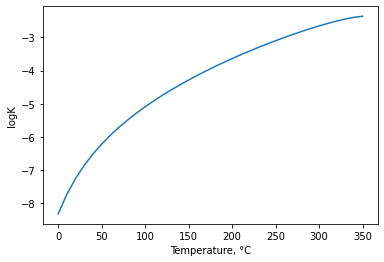

In [17]:
fig = plt.figure()
ax = plt.axes()
x = my_results["out"]["T"]
y = my_results["out"]["logK"]
plt.xlabel("Temperature, °C")
plt.ylabel("logK")
ax.plot(x, y)

## Diagram Demo

In [18]:
reset() # reset database

reset: resetting "thermo" object

OBIGT: loading default database with 1880 aqueous, 3418 total species



Activity diagram of aqueous carbonate species at 25 $^{\circ}$C and 1 bar as a function of pH.

$$\text{CO}_{2} + \text{H}_{2}\text{O} \rightleftharpoons \text{HCO}_{3}^{-} + \text{H}^{+} \rightleftharpoons \text{CO}_{3}^{2-} + 2\text{H}^{+}$$

This plot assumes a total carbon log activity of -3

affinity: temperature is 25 ºC

affinity: pressure is Psat

affinity: variable 1 is pH at 256 values from 2 to 14

subcrt: 9 species at 25 ºC and 1 bar (wet) [energy units: cal]

balance: on moles of CO2 in formation reactions

equilibrate: n.balance is 1 1 1

equilibrate: loga.balance is -2.52287874528034

equilibrate: using boltzmann method



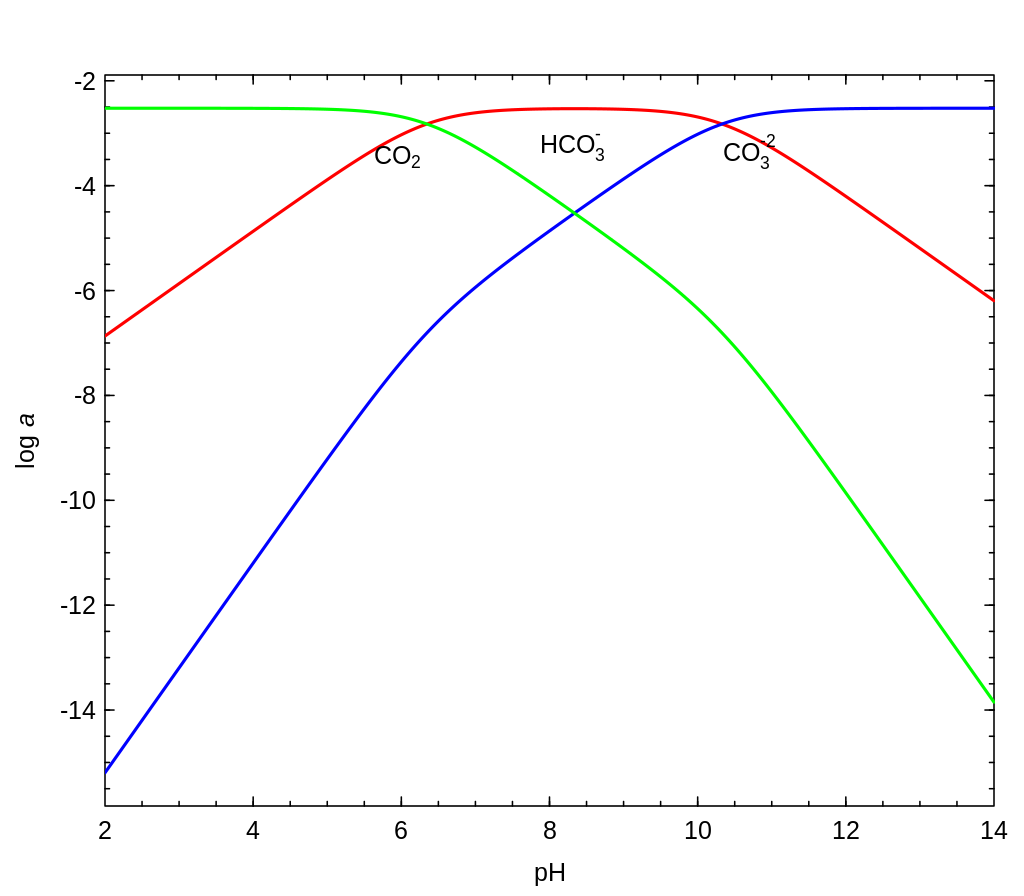

In [19]:
basis("CHNOS+")
species(["HCO3-","CO3-2","CO2"])
a = affinity(pH=[2,14], T=25)
e = equilibrate(a)
_ = diagram(e, col=["red","blue","green"], lwd=2, lty=[1,1,1], dy=-1)

As above, but with fractional abundances ("degree of formation") by setting `alpha=True`

affinity: temperature is 25 ºC

affinity: pressure is Psat

affinity: variable 1 is pH at 256 values from 2 to 14

subcrt: 9 species at 25 ºC and 1 bar (wet) [energy units: cal]

balance: on moles of CO2 in formation reactions

equilibrate: n.balance is 1 1 1

equilibrate: loga.balance is -2.52287874528034

equilibrate: using boltzmann method



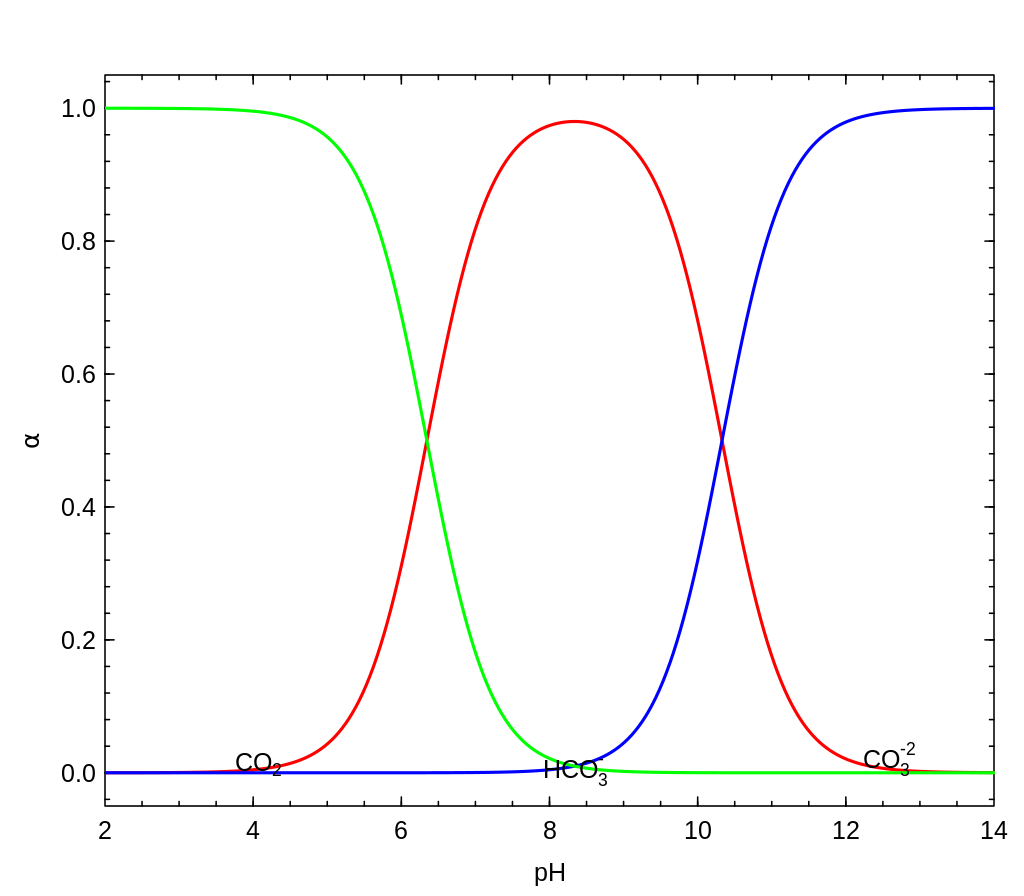

In [20]:
basis("CHNOS+")
species(["HCO3-","CO3-2","CO2"])
a = affinity(pH=[2,14], T=25)
e = equilibrate(a)
_ = diagram(e, alpha=True, col=["red","blue","green"], lwd=2, lty=[1,1,1], dy=-1)

Predominance diagram of carbonate species along the liquid-vapor saturation curve as a function of temperature and pH:

affinity: pressure is Psat

affinity: variable 1 is pH at 256 values from 2 to 14

affinity: variable 2 is T at 256 values from 273.15 to 623.15 K

subcrt: 9 species at 256 values of T (ºC) and P (bar) (wet) [energy units: cal]



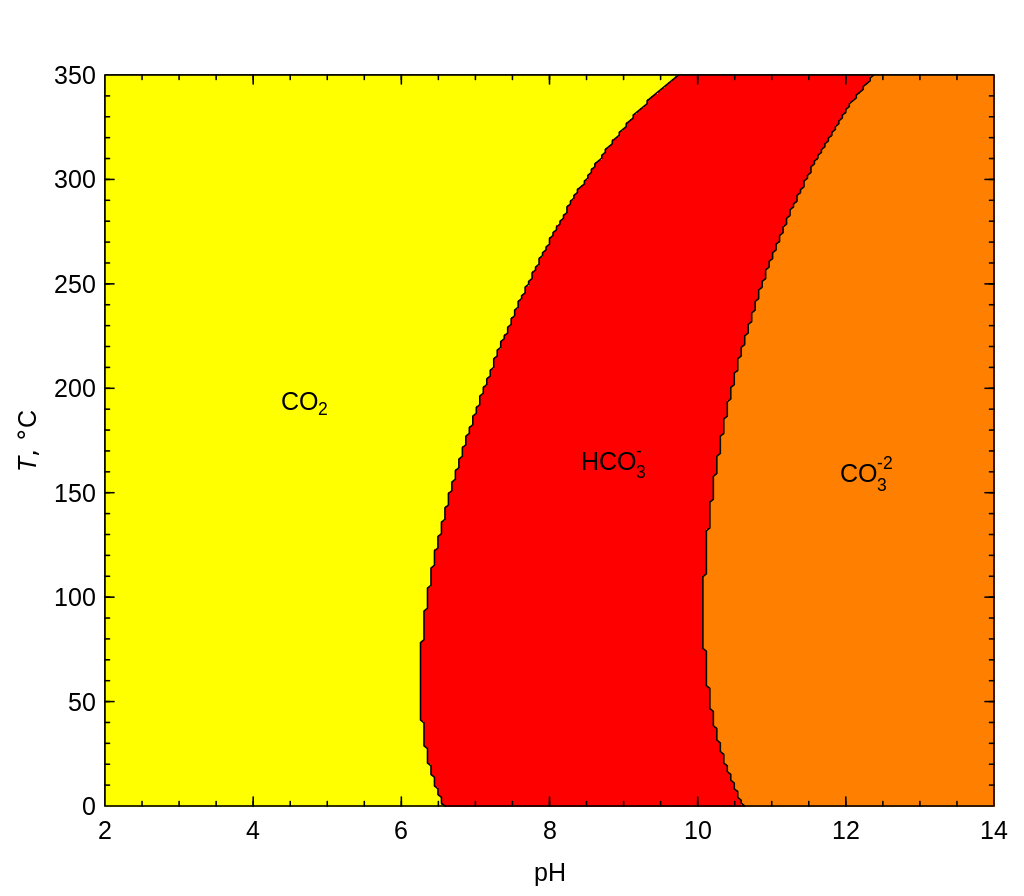

balance: on moles of CO2 in formation reactions

diagram: using maximum affinity method for 2-D diagram



In [21]:
basis("CHNOS+")
species(["HCO3-","CO3-2","CO2"])
a = affinity(pH=[2, 14], T=[0, 350])
_ = diagram(a, fill="heat")

Activity diagram of Al$^{3+}$ species at 25 $^{\circ}$C and 1 bar as a function of pH.

In [22]:
reset() # reset database and basis species

reset: resetting "thermo" object

OBIGT: loading default database with 1880 aqueous, 3418 total species



In [23]:
# load a few additional species like AlO+
_ = add_OBIGT("SLOP98")

add.OBIGT: read 170 rows; made 41 replacements, 129 additions [energy units: cal]



affinity: temperature is 25 ºC

affinity: pressure is Psat

affinity: variable 1 is pH at 256 values from 2 to 8

subcrt: 9 species at 25 ºC and 1 bar (wet) [energy units: cal]



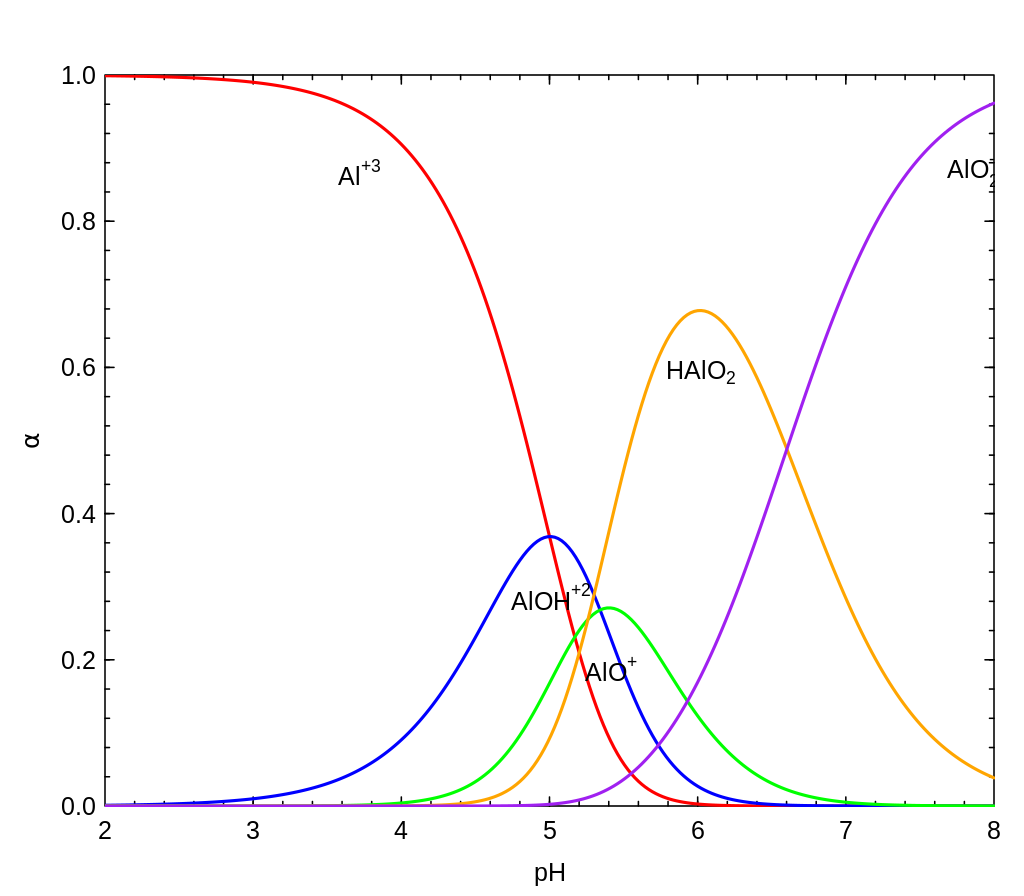

balance: on moles of Al+3 in formation reactions

diagram: plotting A/(2.303RT) / n.balance



In [24]:
basis(["Al+3","H2O","O2","H+"], [-3,0,-80,-7])
species(["Al+3","AlOH+2","AlO+","HAlO2", "AlO2-"])
a = affinity(pH=[2, 8], T=25)
_ = diagram(a, alpha=True, ylim=[0,1], col=["red","blue","green","orange","purple"], lwd=2, lty=[1,1,1], dy=-0.1)

Predominance diagram of Al$^{3+}$ species as a function of pH and temperature:

affinity: pressure is Psat

affinity: variable 1 is pH at 600 values from 0 to 8

affinity: variable 2 is T at 600 values from 298.15 to 623.15 K

subcrt: 9 species at 600 values of T (ºC) and P (bar) (wet) [energy units: cal]



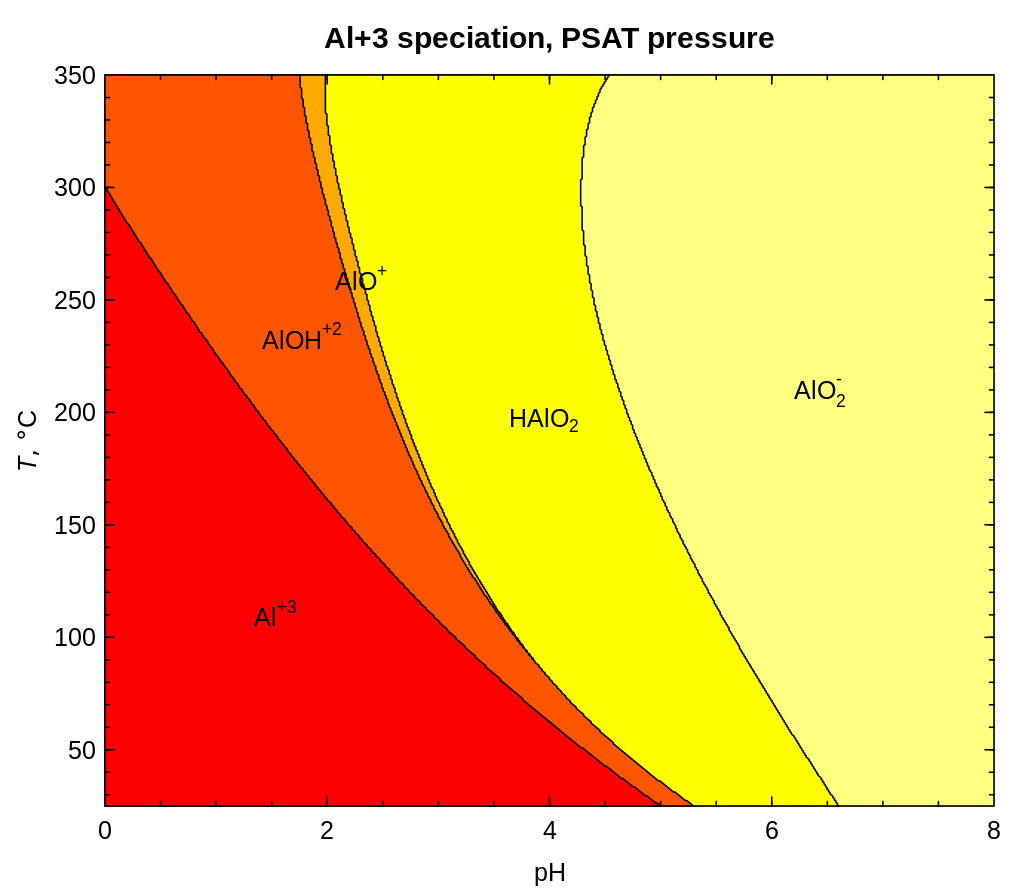

balance: on moles of Al+3 in formation reactions

diagram: using maximum affinity method for 2-D diagram



In [25]:
basis(["Al+3","H2O","O2","H+"], [-3,0,-80,-7])
species(["Al+3","AlOH+2","AlO+","HAlO2", "AlO2-"])
a = affinity(pH=[0, 8, 600], T=[25, 350, 600])
_ = diagram(a, fill="heat", main="Al+3 speciation, PSAT pressure") 

Eh-pH diagram of aqueous sulfur species.

In [26]:
reset() # reset database and basis species

reset: resetting "thermo" object

OBIGT: loading default database with 1880 aqueous, 3418 total species



affinity: temperature is 250 ºC

affinity: pressure is 2000 bar

affinity: variable 1 is pH at 256 values from 0 to 12

affinity: variable 2 is Eh at 256 values from -1 to 0.5 V

subcrt: 8 species at 250 ºC and 2000 bar (wet) [energy units: cal]



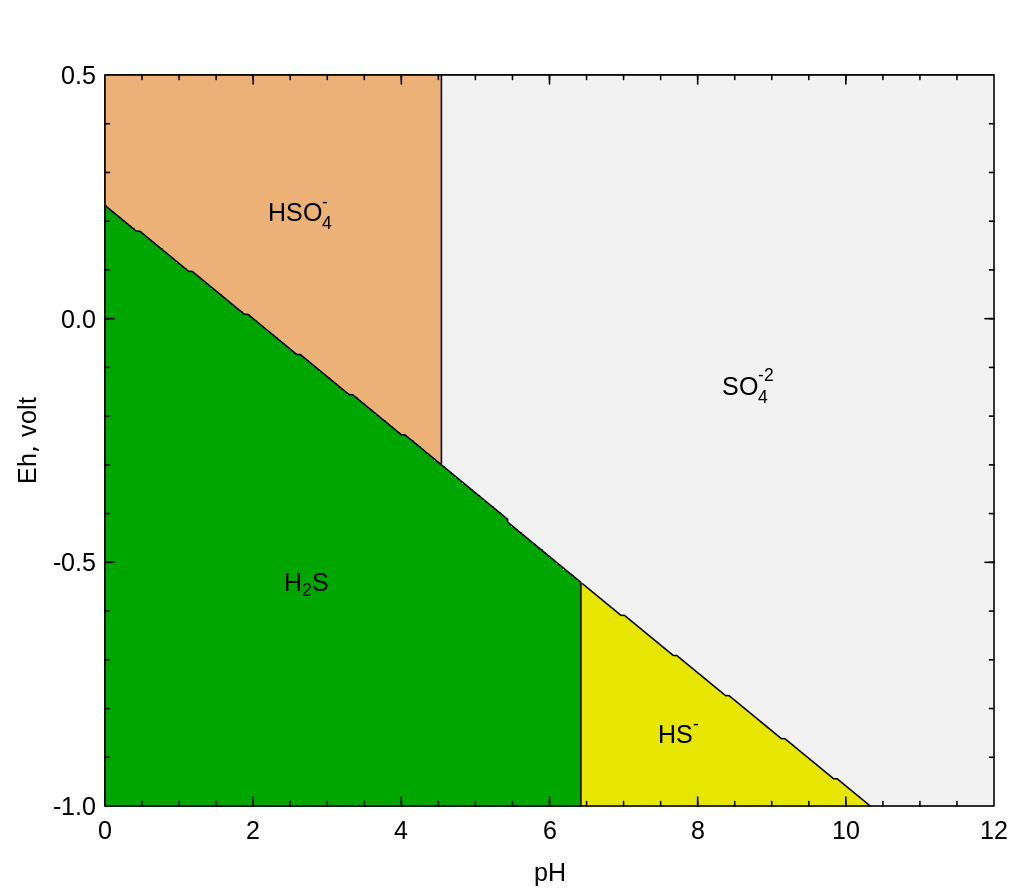

In [27]:
basis(["H2O", "H2S", "e-", "H+"])
species(["H2S", "HS-", "HSO4-", "SO4-2"])
a = affinity(pH=[0, 12], Eh=[-1, 0.5], T=250, P=2000)
_ = diagram(a, fill="terrain", messages=False)